In [1]:
import healpy as hp
import mylib as my
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'mylib'

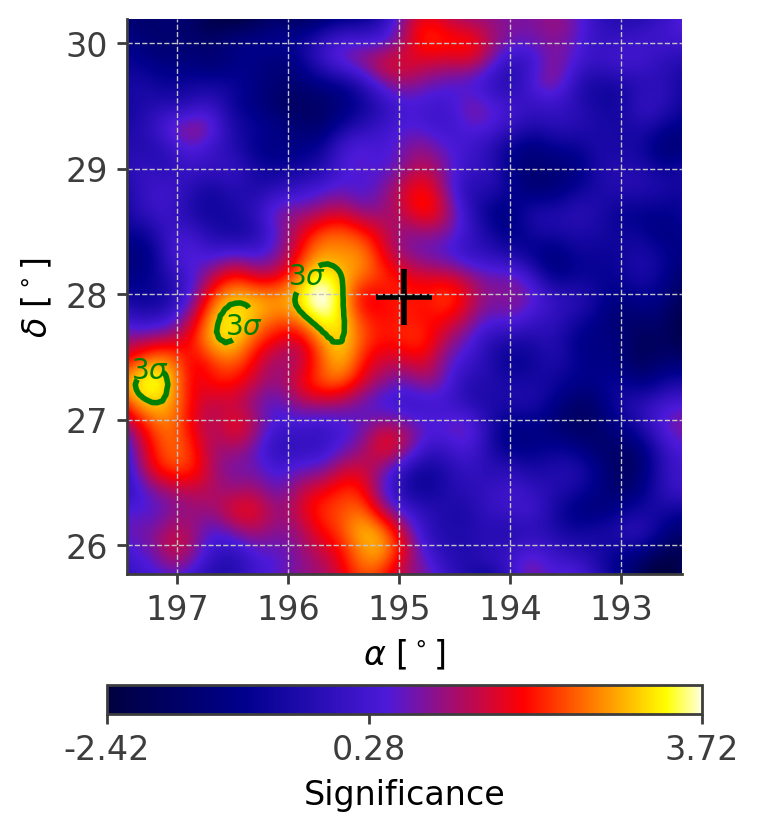

In [3]:
# map2, skymapHeader = hp.read_map("../data/sigts_J0248.fits.gz",h=True)
# map2, skymapHeader = hp.read_map("./llh_skymap/sigts_J0248_resall.fits.gz",h=True)
# map2, skymapHeader = hp.read_map("./llh_skymap/sigts_res_J0248.fits.gz",h=True)
# map2, skymapHeader = hp.read_map("./llh_skymap/sigts_no_diffuse.fits.gz",h=True)
# map2, skymapHeader = hp.read_map("../data/sigts_Diffusion_resall.fits.gz",h=True)
# map2, skymapHeader = hp.read_map("./llh_skymap/sigts_Diffusion_resall.fits.gz",h=True)
# map2, skymapHeader = hp.read_map("./llh_skymap/sigts_gauss_resall.fits.gz",h=True)
map2, skymapHeader = hp.read_map("./llh_skymap/sigts_siglist_Coma.fits.gz",h=True)

ra1=194.9529
dec1=27.9806
map2 = hp.ma(map2)
rad=5
mt.hpDraw(map2,ra1,dec1,
      radx=rad,
      rady=np.cos(dec1/180*np.pi)*rad,
      # contours=[], 
      colorlabel="Significance",
      color="Fermi"
    )

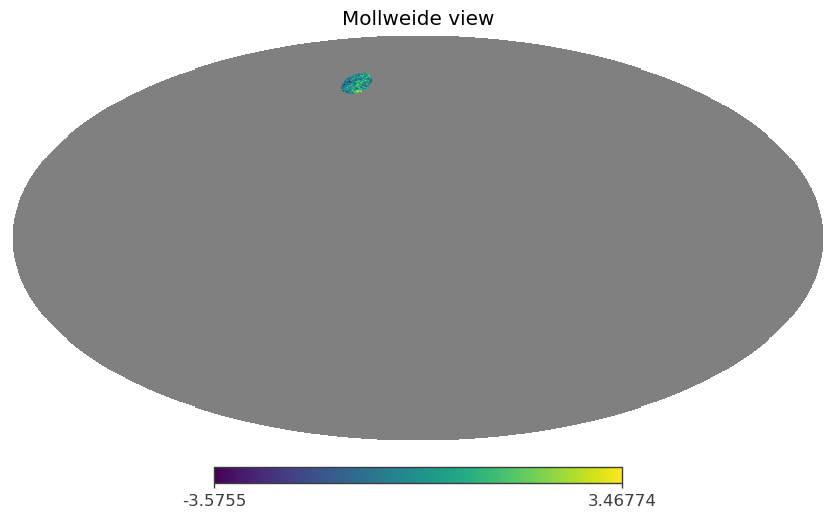

In [4]:
hp.mollview(map2)

************************
[6.90592982e+02 2.89032832e-03 1.04381518e+00]
************************
max Significance= 3.8


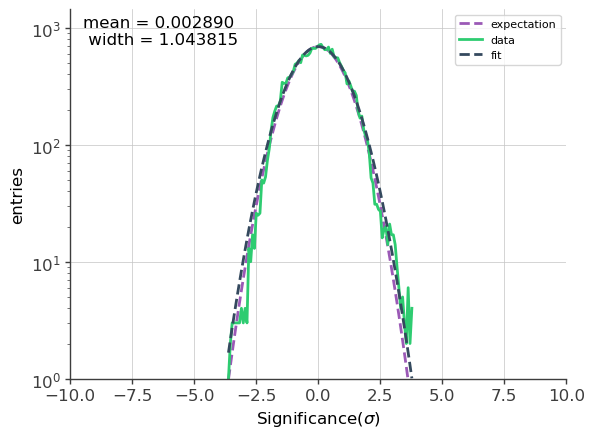

In [5]:
from scipy.optimize import curve_fit

def gaussian(x,a,mu,sigma):
    return a*np.exp(-((x-mu)/sigma)**2/2)

bin_y,bin_x,patches=plt.hist(map2.compressed(),bins=100)
plt.close()
bin_x=np.array(bin_x)
bin_y=np.array(bin_y)
fit_range = np.logical_and(bin_x>-5, bin_x<5)
wdt=(bin_x[1]-bin_x[0])/2.
try:
    popt, pcov = curve_fit(
        gaussian,
        bin_x[fit_range] + wdt,
        bin_y[fit_range[:-1]],
        bounds=([100, -2, 0], [50000000, 2, 10]),
    )
except (ValueError, IndexError):
    popt, pcov = curve_fit(
        gaussian,
        bin_x[:100] + wdt,
        bin_y[:100],
        bounds=([100, -2, 0], [50000000, 2, 10]),
    )
#popt,pcov = curve_fit(gaussian,bin_x[fit_range[0:-1]]+(bin_x[1]-bin_x[0])/2.,bin_y[fit_range[0:-1]],bounds=([100,-2,0],[50000000,2,10]))
print("************************")
print(popt)
print("************************")
print("max Significance= %.1f"%(max(map2.compressed())))

plt.figure()
#plt.plot([0.,0.],[1,1e6],'k--',linewidth=0.5)
plt.plot(
    (bin_x[:100] + bin_x[1:101]) / 2,
    gaussian((bin_x[:100] + bin_x[1:101]) / 2, popt[0], 0, 1),
    '--',
    label='expectation',
)
plt.plot((bin_x[:100] + bin_x[1:101]) / 2, bin_y, label="data")
plt.plot(
    (bin_x[:100] + bin_x[1:101]) / 2,
    gaussian((bin_x[:100] + bin_x[1:101]) / 2, popt[0], popt[1], popt[2]),
    '--',
    label='fit',
)
plt.yscale('log')
plt.xlim(-10,10)
plt.ylim(1,max(bin_y*2))
plt.grid(True)
plt.text(-9.5,max(bin_y),'mean = %f\n width = %f'%(popt[1],popt[2]))
plt.xlabel(r'Significance($\sigma$)')
plt.ylabel("entries")
plt.legend()

### Coma

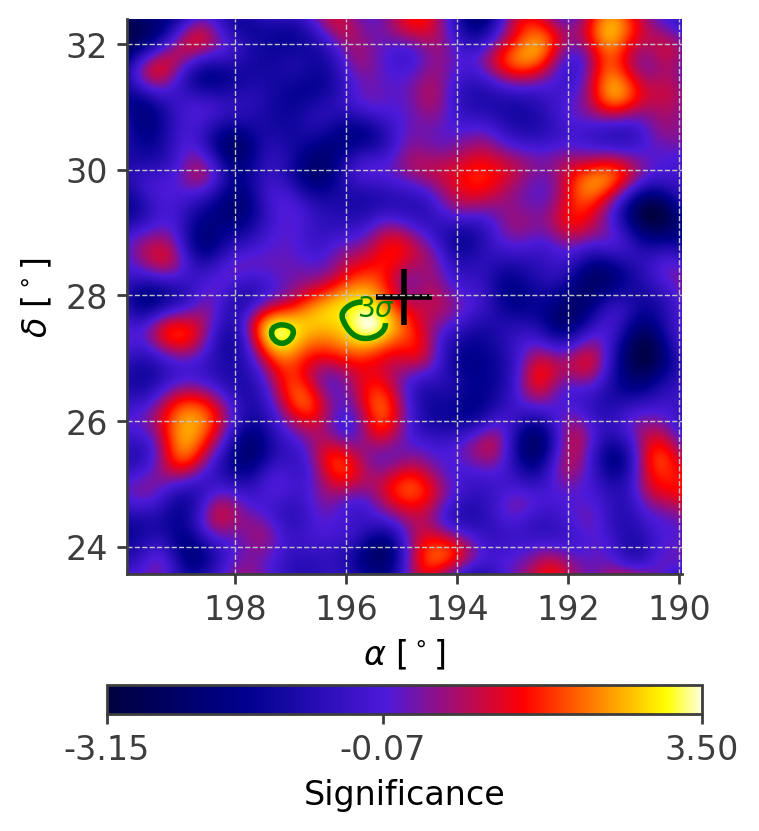

In [34]:
map1, skymapHeader = hp.read_map("../data/signif_gcd_new_nHit006_0.30.fits.gz_other.fits.gz",h=True)

ra1=194.9529
dec1=27.9806
rad = 10
map2 = hp.ma(map1)
mt.hpDraw(map1,ra1,dec1,
      radx=rad,A
      rady=np.cos(dec1/180*np.pi)*rad,
      # contours=[3], 
      colorlabel="Significance",
      color="Fermi"
    )

### Perseus

49.17916666666666 41.32472222222223 IC 310
49.950416666666655 41.51166666666666 NGC 1275



WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.



50.86091666666666 39.74802777777778 J0323+3944



WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.



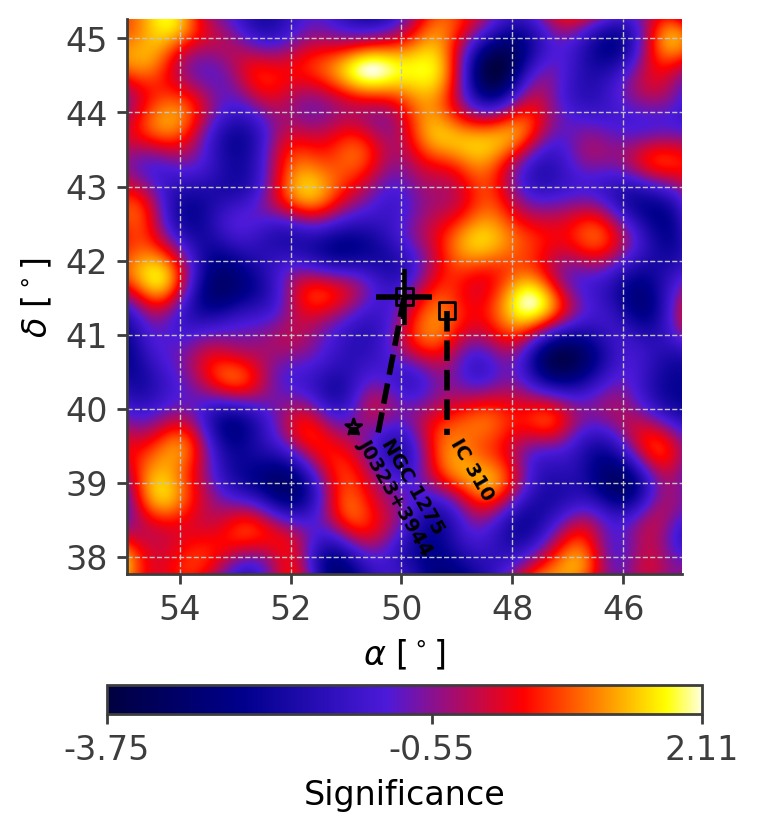

In [35]:
map1, skymapHeader = hp.read_map("../data/signif_gcd_new_nHit006_0.30.fits.gz_other.fits.gz",h=True)

ra1=49.9467
dec1=41.5131
rad = 10
map2 = hp.ma(map1)
mt.hpDraw(map1,ra1,dec1,
      radx=rad,
      rady=np.cos(dec1/180*np.pi)*rad,
      # contours=[3], 
      colorlabel="Significance",
      color="Fermi"
    )

### Virgo

187.69666666666666 12.397499999999999 M 87



WARNING UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.



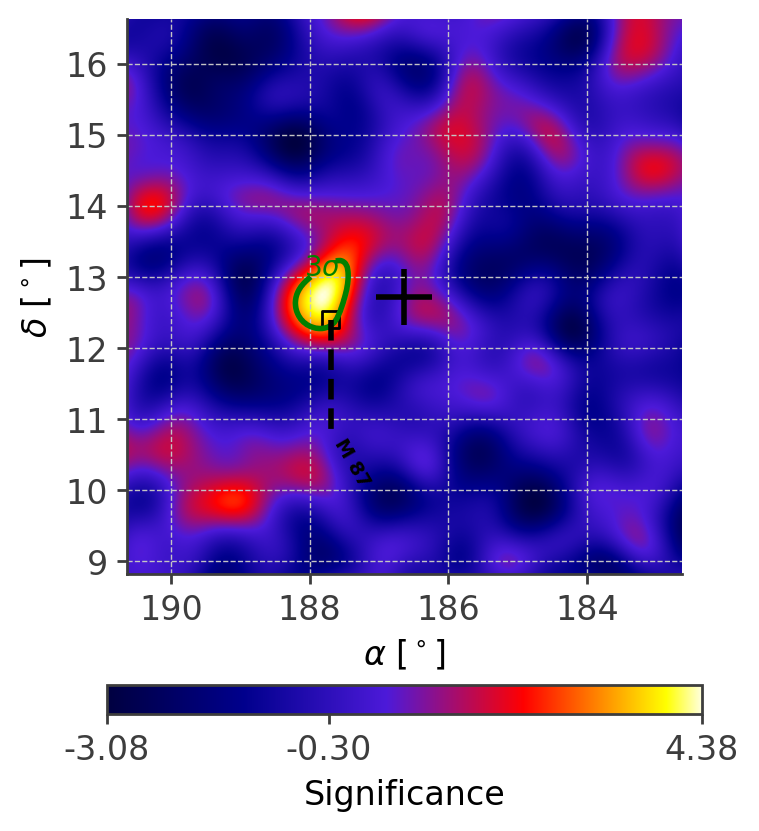

In [37]:
map1, skymapHeader = hp.read_map("../data/signif_gcd_new_nHit006_0.30.fits.gz_other.fits.gz",h=True)

ra1=186.6337
dec1=12.7233
rad = 8
map2 = hp.ma(map1)
mt.hpDraw(map1,ra1,dec1,
      radx=rad,
      rady=np.cos(dec1/180*np.pi)*rad,
      # contours=[3], 
      colorlabel="Significance",
      color="Fermi"
    )